# CIFAR10에서 딥러닝

# setting

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

a. 문제: 100개의 뉴런을 가진 은닉층 20개로 심층 신경망을 만들어보세요(너무 많은 것 같지만 이 연습문제의 핵심입니다). He 초기화와 ELU 활성화 함수를 사용하세요.

In [2]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3])) 
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu", 
                                 kernel_initializer="he_normal")) 

b. Nadam 옵티마이저와 조기 종료를 사용하여 CIFAR10 데이터셋에 이 네트워크를 훈련하세요. keras.datasets.cifar10.load_ data()를 사용하여 데이터를 적재할 수 있습니다. 이 데이터셋은 10개의 클래스와 32×32 크기의 컬러 이미지 60,000개로 구성됩니다(50,000개는 훈련, 10,000개는 테스트). 따라서 10개의 뉴런과 소프트맥스 활성화 함수를 사용하는 출력층이 필요합니다. 모델 구조와 하이퍼파라미터를 바꿀 때마다 적절한 학습률을 찾아야 한다는 것을 기억하세요.

In [3]:
# data 적재
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]


170508288/170498071 [==============================] - 4s 0us/step


In [7]:
print(X_train.shape)
print(len(X_train))
print(len(X_valid))

(45000, 32, 32, 3)
45000
5000


In [ ]:
#soft max 출력층 추가
model.add(keras.layers.Dense(10, activation="softmax"))

# optimizer nadam
optimizer = keras.optimizers.Nadam(lr=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
print(X_train.shape)
print(y_train.shape)

(45000, 32, 32, 3)
(45000, 1)


In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 # 모델을 훈련할 때마다 증가시킴
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [ ]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 24s 15ms/step - loss: 3.9882 - accuracy: 0.1750 - val_loss: 2.1041 - val_accuracy: 0.2368
Epoch 2/100
1407/1407 [==============================] - 18s 13ms/step - loss: 2.0415 - accuracy: 0.2551 - val_loss: 2.1067 - val_accuracy: 0.2406
Epoch 3/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.9307 - accuracy: 0.2952 - val_loss: 1.9628 - val_accuracy: 0.2804
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.8526 - accuracy: 0.3225 - val_loss: 1.8137 - val_accuracy: 0.3412
Epoch 5/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.7864 - accuracy: 0.3496 - val_loss: 1.8074 - val_accuracy: 0.3374
Epoch 6/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.7375 - accuracy: 0.3695 - val_loss: 1.7179 - val_accuracy: 0.3798
Epoch 7/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.6983 - accuracy: 0.3864 - val_loss: 1

In [ ]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 1.5154 - accuracy: 0.4812


[1.515366554260254, 0.4812000095844269]

c. 배치 정규화를 추가하고 학습 곡선을 비교해보세요. 이전보다 빠르게 수렴하나요? 더 좋은 모델이 만들어지나요? 훈련 속도에는 어떤 영향을 미치나요?

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # 모델을 훈련할 때마다 증가시킴
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1407/1407 [==============================] - 39s 20ms/step - loss: 1.8462 - accuracy: 0.3394 - val_loss: 1.6817 - val_accuracy: 0.4050
Epoch 2/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.6724 - accuracy: 0.4062 - val_loss: 1.6114 - val_accuracy: 0.4206
Epoch 3/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.5975 - accuracy: 0.4324 - val_loss: 1.5443 - val_accuracy: 0.4548
Epoch 4/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.5475 - accuracy: 0.4485 - val_loss: 1.5008 - val_accuracy: 0.4596
Epoch 5/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.5069 - accuracy: 0.4644 - val_loss: 1.4573 - val_accuracy: 0.4838
Epoch 6/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.4688 - accuracy: 0.4789 - val_loss: 1.4245 - val_accuracy: 0.4936
Epoch 7/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.4379 - accuracy: 0.4880 - val_loss: 1

[1.3280383348464966, 0.5424000024795532]

- 이전보다 빠르게 수렴하나요? 훨씬 빠릅니다! 이전 모델은 가장 낮은 검증 손실에 도달하기 위해 27 에포크가 걸렸지만 새 모델은 동일한 손실에 도달하는데 5 에포크가 걸렸고 16 에포크까지 계속 줄어듭니다. 이전 모델보다 두 배 이상 빠릅니다. BN 층은 훈련을 안정적으로 수행하고 더 큰 학습률을 사용할 수 있기 때문에 수렴이 빨라졌습니다.
- BN이 더 좋은 모델을 만드나요? 네! 최종 모델의 성능이 47.6%가 아니라 54.0% 정확도로 더 좋습니다. 이는 아주 좋은 모델이 아니지만 적어도 이전보다는 낫습니다(합성곱 신경망이 더 낫겠지만 이는 다른 주제입니다. 14장을 참고하세요).
- BN이 훈련 속도에 영향을 미치나요? 모델이 훨씬 빠르게 수렴했지만 각 에포크는 8초가 아니라 12초가 걸렸습니다. BN 층에서 추가된 계산 때문입니다. 하지만 전반적인 훈련 시간(탁상 시계 시간)은 크게 줄었습니다!

d. 배치 정규화를 SELU로 바꾸어보세요. 네트워크가 자기 정규화하기 위해 필요한 변경 사항을 적용해보세요(즉, 입력 특성 표준화, 르쿤 정규분포 초기화, 완전 연결 층만 순차적으로 쌓은 심층 신경망 등).

In [ ]:
# 활성화 함수만 셀루로 바꿈 배치정규화도 없애고
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 # 모델을 훈련할 때마다 증가시킴
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1407/1407 [==============================] - 21s 13ms/step - loss: 1.9176 - accuracy: 0.3125 - val_loss: 1.8557 - val_accuracy: 0.3402
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7046 - accuracy: 0.3943 - val_loss: 1.7404 - val_accuracy: 0.3784
Epoch 3/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.6085 - accuracy: 0.4348 - val_loss: 1.7106 - val_accuracy: 0.3906
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5486 - accuracy: 0.4558 - val_loss: 1.6228 - val_accuracy: 0.4376
Epoch 5/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4902 - accuracy: 0.4764 - val_loss: 1.6360 - val_accuracy: 0.4288
Epoch 6/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4453 - accuracy: 0.4922 - val_loss: 1.5338 - val_accuracy: 0.4578
Epoch 7/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4072 - accuracy: 0.5069 - val_loss: 1

[1.4628735780715942, 0.49779999256134033]

In [ ]:
model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 1.4629 - accuracy: 0.4978


[1.4628735780715942, 0.49779999256134033]

e. 알파 드롭아웃으로 모델에 규제를 적용해보세요. 그다음 모델을 다시 훈련하지 않고 MC 드롭아웃으로 더 높은 정확도를 얻을 수 있는지 확인해보세요.

In [8]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5", save_best_only=True)
run_index = 1 # 모델을 훈련할 때마다 증가시킴
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1407/1407 [==============================] - 23s 14ms/step - loss: 1.8990 - accuracy: 0.3237 - val_loss: 1.7690 - val_accuracy: 0.3812
Epoch 2/100
1407/1407 [==============================] - 19s 13ms/step - loss: 1.6595 - accuracy: 0.4139 - val_loss: 1.6994 - val_accuracy: 0.3936
Epoch 3/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.5701 - accuracy: 0.4474 - val_loss: 1.5827 - val_accuracy: 0.4392
Epoch 4/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.5020 - accuracy: 0.4730 - val_loss: 1.5694 - val_accuracy: 0.4512
Epoch 5/100
1407/1407 [==============================] - 19s 13ms/step - loss: 1.4441 - accuracy: 0.4930 - val_loss: 1.5916 - val_accuracy: 0.4680
Epoch 6/100
1407/1407 [==============================] - 19s 13ms/step - loss: 1.3982 - accuracy: 0.5117 - val_loss: 1.5119 - val_accuracy: 0.4862
Epoch 7/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.3531 - accuracy: 0.5318 - val_loss: 1

[1.4880553483963013, 0.49639999866485596]

MC 드롭 써보자

In [9]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [10]:
# 똑같은 가중치를 가진 mc모델 생성
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

그다음 몇 가지 유틸리티 함수를 추가합니다. 첫 번째 함수는 모델을 여러 번 실행합니다(기본적으로 10번). 그다음 평균한 예측 클래스 확률을 반환합니다. 두 번째 함수는 이 평균 확률을 사용해 각 샘플의 클래스를 예측합니다:

In [11]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)


이제 검증 세트의 모든 샘플에 대해 예측을 만들고 정확도를 계산해 보죠:

In [12]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.498

f. 1사이클 스케줄링으로 모델을 다시 훈련하고 훈련 속도와 모델 정확도가 향상되는지 확인해보세요.

In [13]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(lr=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [22]:
import math

In [23]:
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

352/352 [==============================] - 6s 14ms/step - loss: nan - accuracy: 0.1390


(9.999999747378752e-06,
 9.615227699279785,
 2.6199238300323486,
 3.9377043928418844)

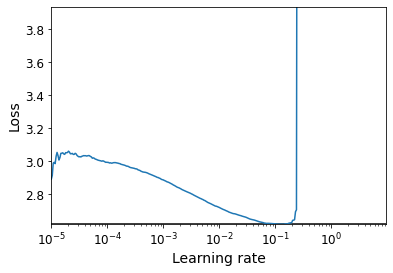

In [24]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [25]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(lr=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [26]:

n_epochs = 15
onecycle = OneCycleScheduler(len(X_train_scaled) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 6s 16ms/step - loss: 2.0544 - accuracy: 0.2858 - val_loss: 1.7799 - val_accuracy: 0.3848
Epoch 2/15
352/352 [==============================] - 5s 15ms/step - loss: 1.7508 - accuracy: 0.3807 - val_loss: 1.6362 - val_accuracy: 0.4252
Epoch 3/15
352/352 [==============================] - 5s 15ms/step - loss: 1.6132 - accuracy: 0.4288 - val_loss: 1.6246 - val_accuracy: 0.4312
Epoch 4/15
352/352 [==============================] - 5s 15ms/step - loss: 1.5374 - accuracy: 0.4552 - val_loss: 1.6158 - val_accuracy: 0.4392
Epoch 5/15
352/352 [==============================] - 5s 15ms/step - loss: 1.4870 - accuracy: 0.4728 - val_loss: 1.6431 - val_accuracy: 0.4472
Epoch 6/15
352/352 [==============================] - 5s 15ms/step - loss: 1.4459 - accuracy: 0.4888 - val_loss: 1.5829 - val_accuracy: 0.4564
Epoch 7/15
352/352 [==============================] - 5s 15ms/step - loss: 1.4105 - accuracy: 0.5004 - val_loss: 1.5944 - val_accuracy: 0.4560